In [92]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [93]:
# Physical Constants
hbar = 1.055e-34      # Js
q = 1.602e-19         # C
m = 9.1e-31           # kg
m_dot = 0.2 * m       # kg  
bohr_radii = 5.29e-11 # m
a = 1e-10             # m

In [94]:
def VDQD(alpha, x1, x2, x):
    return alpha * min((x - x1) ** 2, (x - x2) ** 2)

def VFT(alpha, F, omega, x1, x2, x, t):
    return alpha * min((x - x1) ** 2, (x - x2) ** 2) + F * x * np.cos(omega * t)

In [95]:
@jit
def construct_H(U):
    return np.diag(on + U) + np.diag(off, 1) + np.diag(off, -1)

In [96]:
@jit
def compute_eigenvalue_eigenstates(U):
    H = construct_H(U)
    W, V = np.linalg.eigh(H)
    idx = W.argsort()[::1]
    W = W[idx]
    V = V[:, idx]
    return W, V

In [97]:
def plot_graph(x, y, xlabel, ylabel, title, axis=None):
    if axis is not None:
        axis.plot(x, y)
        axis.set_xlabel(xlabel)
        axis.set_ylabel(ylabel)
        axis.set_title(title)
    else:
        plt.plot(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)

In [107]:
# Spatial Constants
Np = 700
X = a * np.linspace(-Np / 2, Np / 2, Np) / 1e-9  # nm
dx = (X[1] - X[0]) * 1e-9

t0 = hbar ** 2 / (2 * m_dot * (dx ** 2)) / q
on = 2.0 * t0 * np.ones(Np)
off = -t0 * np.ones(Np - 1)

alpha = 2.1e-5
x1, x2 = 10, -10
F = 0.025e-3

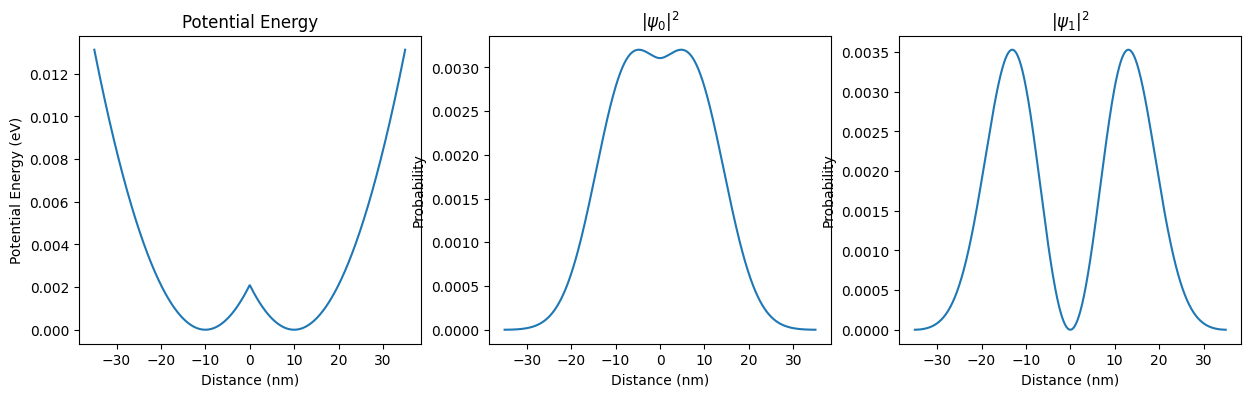

In [108]:
U = np.array([VDQD(alpha, x1, x2, x) for x in X])
W, V = compute_eigenvalue_eigenstates(U)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
Psi0 = np.multiply(V[:, 0], V[:, 0])
Psi1 = np.multiply(V[:, 1], V[:, 1])
plot_graph(X, U, 'Distance (nm)', 'Potential Energy (eV)', r'Potential Energy', axes[0])
plot_graph(X, Psi0, 'Distance (nm)', 'Probability', r'$|\psi_0|^2$', axes[1])
plot_graph(X, Psi1, 'Distance (nm)', 'Probability', r'$|\psi_1|^2$', axes[2])
plt.show()

In [109]:
omega = (W[1] - W[0]) / hbar * q
print(f'Energy Gap is {(W[1] - W[0]).real * 1e3:.2F} meV')
print(f'Frequency of Oscillation is {omega.real / (2 * np.pi):.2E} s')
print(f'Period of Oscillation is {2 * np.pi / omega.real:.2E} Hz')

Energy Gap is 1.66 meV
Frequency of Oscillation is 4.02E+11 s
Period of Oscillation is 2.49E-12 Hz


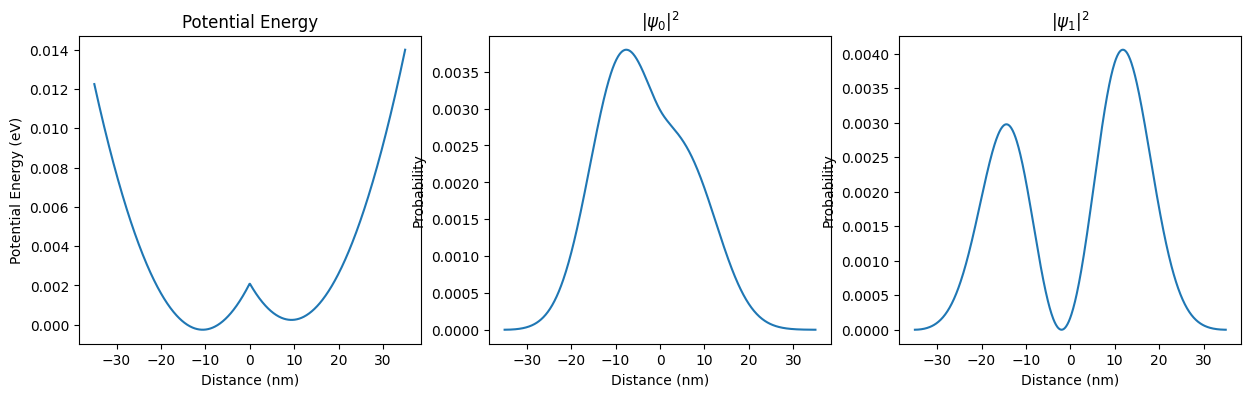

In [110]:
U = np.array([VFT(alpha, F, omega, x1, x2, x, 0) for x in X])
W, V = compute_eigenvalue_eigenstates(U)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
Psi0 = np.multiply(V[:, 0], V[:, 0])
Psi1 = np.multiply(V[:, 1], V[:, 1])
plot_graph(X, U, 'Distance (nm)', 'Potential Energy (eV)', r'Potential Energy', axes[0])
plot_graph(X, Psi0, 'Distance (nm)', 'Probability', r'$|\psi_0|^2$', axes[1])
plot_graph(X, Psi1, 'Distance (nm)', 'Probability', r'$|\psi_1|^2$', axes[2])
plt.show()

In [111]:
# Temporal Constants
Nt = 100
T = np.linspace(0, 4 * np.pi / omega, Nt)         # s (double the period)
dt = T[1] - T[0]                                  # s

Generation 0
	 p0 = 1.00
	 p1 = 0.00
Generation 1
	 p0 = 1.00
	 p1 = 0.00
Generation 2
	 p0 = 1.00
	 p1 = 0.00
Generation 3
	 p0 = 1.00
	 p1 = 0.00
Generation 4
	 p0 = 1.00
	 p1 = 0.00
Generation 5
	 p0 = 1.00
	 p1 = 0.00
Generation 6
	 p0 = 1.00
	 p1 = 0.00
Generation 7
	 p0 = 1.00
	 p1 = 0.00
Generation 8
	 p0 = 1.00
	 p1 = 0.00
Generation 9
	 p0 = 1.00
	 p1 = 0.00
Generation 10
	 p0 = 1.00
	 p1 = 0.00
Generation 11
	 p0 = 1.00
	 p1 = 0.00
Generation 12
	 p0 = 0.99
	 p1 = 0.01
Generation 13
	 p0 = 0.99
	 p1 = 0.01
Generation 14
	 p0 = 0.99
	 p1 = 0.01
Generation 15
	 p0 = 0.98
	 p1 = 0.02
Generation 16
	 p0 = 0.97
	 p1 = 0.02
Generation 17
	 p0 = 0.97
	 p1 = 0.03
Generation 18
	 p0 = 0.96
	 p1 = 0.04
Generation 19
	 p0 = 0.95
	 p1 = 0.05
Generation 20
	 p0 = 0.93
	 p1 = 0.07
Generation 21
	 p0 = 0.92
	 p1 = 0.08
Generation 22
	 p0 = 0.90
	 p1 = 0.09
Generation 23
	 p0 = 0.89
	 p1 = 0.11
Generation 24
	 p0 = 0.87
	 p1 = 0.13
Generation 25
	 p0 = 0.85
	 p1 = 0.14
Generation 26
	 p0 = 0

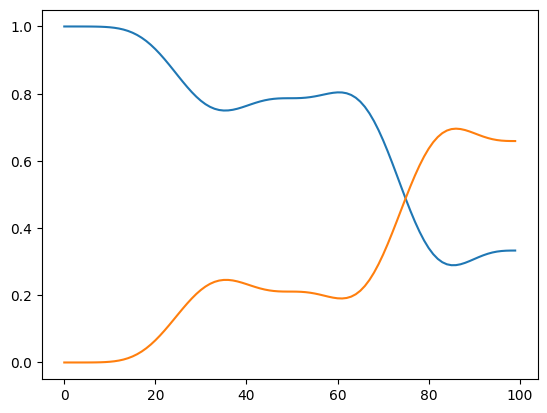

In [112]:
U = np.array([VFT(alpha, F, omega, x1, x2, x, 0) for x in X])
W, V = compute_eigenvalue_eigenstates(U)

psi = np.array(V[:, 0], dtype=np.complex128)
H = construct_H(U).astype(np.complex128)

p0 = np.array([np.abs(psi @ V[:, 0])])
p1 = np.array([np.abs(psi @ V[:, 1])])

print(f'Generation 0')
print(f'\t p0 = {np.abs(psi @ V[:, 0]):.2f}')
print(f'\t p1 = {np.abs(psi @ V[:, 1]):.2f}')

for i in range(1, Nt):
    t = T[i]
    U_new = np.array([VFT(alpha, F, omega, x1, x2, x, t) for x in X])
    H_new = construct_H(U_new).astype(np.complex128)
    
    A = (np.identity(Np) + 1j * dt / (2 * hbar) * H_new * q)
    B = (np.identity(Np) - 1j * dt / (2 * hbar) * H * q) @ psi
    psi_new = np.linalg.solve(A, B)
    
    pr0 = np.abs(psi_new @ V[:, 0]) ** 2
    pr1 = np.abs(psi_new @ V[:, 1]) ** 2
    
    p0 = np.append(p0, pr0) 
    p1 = np.append(p1, pr1) 
    
    print(f'Generation {i}')
    print(f'\t p0 = {pr0:.2f}')
    print(f'\t p1 = {pr1:.2f}')
    
    psi = psi_new
    H = H_new
    
plt.plot(p0)
plt.plot(p1)

In [12]:
for i, F in enumerate(np.linspace(0, 0.25, 100) * 1e-3):
    U = np.array([VFT(alpha, F, omega, x1, x2, x, 0) for x in X])
    W, V = compute_eigenvalue_eigenstates(U)

    psi = np.array(V[:, 0], dtype=np.complex128)
    H = construct_H(U).astype(np.complex128)

    p0 = np.array([np.abs(psi @ V[:, 0])])
    p1 = np.array([np.abs(psi @ V[:, 1])])


    for i in range(1, Nt):
        t = T[i]
        U_new = np.array([VFT(alpha, F, omega, x1, x2, x, t) for x in X])
        H_new = construct_H(U_new).astype(np.complex128)

        A = (np.identity(Np) + 1j * dt / (2 * hbar) * H_new * q)
        B = (np.identity(Np) - 1j * dt / (2 * hbar) * H * q) @ psi
        psi_new = np.linalg.solve(A, B)
    
        pr0 = np.abs(psi_new @ V[:, 0]) ** 2
        pr1 = np.abs(psi_new @ V[:, 1]) ** 2

        p0 = np.append(p0, pr0)
        p1 = np.append(p1, pr1)

        psi = psi_new
        H = H_new

    plt.figure(i)
    plt.plot(p0)
    plt.plot(p1)
    plt.savefig(f'{F / 1e-3:.2f}.png')
    plt.clf()

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>